In [69]:
# Import packages for data analysis
import pandas   as pd
import numpy    as np
import datetime as dt
import matplotlib.pyplot as plt

In [70]:
# Read in Chicago speed camera csv data
chicago_cameras = pd.read_csv('Speed_Camera_Violations.csv') # THIS FILE MUST BE IN WORKING DIRECTORY!!!!!!

In [71]:
# Inspect the data
chicago_cameras.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


In [72]:
# Change 'VIOLATION DATE' column from str type to datetime type
chicago_cameras['VIOLATION DATE'] = pd.to_datetime(chicago_cameras['VIOLATION DATE'], format = '%m/%d/%Y')
chicago_cameras.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,2014-07-08,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,2014-07-16,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,2014-07-08,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,2014-07-26,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,2014-07-27,92,NaN,NaN,NaN,NaN,NaN


In [73]:
# Get total number of days in data set
nDays = len(set(chicago_cameras.loc[:,'VIOLATION DATE']))
nDays

1637

In [74]:
# Get number of unique traffic cameras
nCameras = len(set(chicago_cameras.loc[:,'CAMERA ID']))
nCameras

162

In [75]:
# Get total number of observations
nObs = max(chicago_cameras.count())

In [76]:
# Take subset of the full data set
violations = chicago_cameras.loc[:,['VIOLATION DATE', 'VIOLATIONS']]
violations = violations.sort_values(by = 'VIOLATION DATE')
violations.head()

,VIOLATION DATE,VIOLATIONS
15822,2014-07-01,7
15645,2014-07-01,68
15641,2014-07-01,64
11845,2014-07-01,10
11846,2014-07-01,32


In [77]:
# Find total number of violations per camera per day
daily_per_cam = violations['VIOLATIONS'].mean()
print("Average number of violations per camera per day: " + str(round(daily_per_cam,2)))

Average number of violations per camera per day: 28.88


In [86]:
# Create a new column containing the day of the week
violations['WEEKDAY'] = violations['VIOLATION DATE'].dt.weekday_name
violations.head()

,VIOLATION DATE,VIOLATIONS,WEEKDAY
15822,2014-07-01,7,Tuesday
15645,2014-07-01,68,Tuesday
15641,2014-07-01,64,Tuesday
11845,2014-07-01,10,Tuesday
11846,2014-07-01,32,Tuesday


In [79]:
# Determine the day with the highest number of violations (SPOILER: it's Friday)
weekday_viols = violations.groupby(['WEEKDAY']).sum()
weekday_viols = weekday_viols.sort_values(by = 'VIOLATIONS', ascending = False)
weekday_viols # Friday has more violations than any other day of the week

,VIOLATIONS
WEEKDAY,
Friday,753468
Thursday,730603
Tuesday,708276
Wednesday,705136
Monday,686724
Saturday,676715
Sunday,663801


In [81]:
# Take subset of full data set
active_cams = chicago_cameras.loc[:,['CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS']]
active_cams = active_cams.sort_values(by = 'VIOLATION DATE')
active_cams.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS
15822,CHI103,2014-07-01,7
15645,CHI074,2014-07-01,68
15641,CHI041,2014-07-01,64
11845,CHI104,2014-07-01,10
11846,CHI033,2014-07-01,32


In [82]:
# Create 'DAY', 'YEAR', and 'MONTH' columns from 'VIOLATION DATE'
active_cams['DAY'] = active_cams['VIOLATION DATE'].dt.day
active_cams['MONTH'] = active_cams['VIOLATION DATE'].dt.month
active_cams['YEAR'] = active_cams['VIOLATION DATE'].dt.year
active_cams.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS,DAY,MONTH,YEAR
15822,CHI103,2014-07-01,7,1,7,2014
15645,CHI074,2014-07-01,68,1,7,2014
15641,CHI041,2014-07-01,64,1,7,2014
11845,CHI104,2014-07-01,10,1,7,2014
11846,CHI033,2014-07-01,32,1,7,2014


In [83]:
# Determine number of cameras that were active on each day
active = active_cams.groupby(['YEAR','MONTH','DAY']).count()
active.head()

CAMERA ID  VIOLATION DATE  VIOLATIONS
YEAR MONTH DAY                                       
2014 7     1           95              95          95
           2           92              92          92
           3           94              94          94
           4           62              62          62
           5           63              63          63

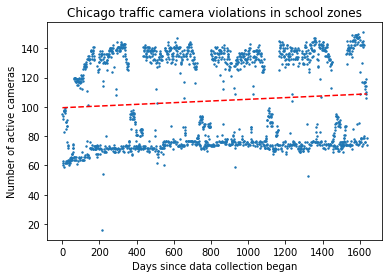

In [84]:
# Plot the number of active cameras for each day in the data set
num_active = np.array(active['CAMERA ID'])
days = list(range(1, len(num_active)+1))

plt.scatter(days, num_active, s = 2)

lm = np.polyfit(days, num_active, 1)
trendline = np.poly1d(lm)
plt.plot(days,trendline(days), "r--")

plt.title("Chicago traffic camera violations in school zones")
plt.xlabel("Days since data collection began")
plt.ylabel("Number of active cameras")

plt.show() # Looks like there is a slight increase in active cameras over time

In [85]:
# Inspect outlier minimum violations point
outlier = int(np.where(num_active == min(num_active))[0])
active.iloc[outlier,:] # There was a huge winter storm that day AND it was a Sunday (days with lowest number of violations)

CAMERA ID         16
VIOLATION DATE    16
VIOLATIONS        16
Name: (2015, 2, 1), dtype: int64